# Hypothesis 1: The autoreg model distinguishes between answerable and unanswerable questions

In [1]:
import csv
import matplotlib
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
losses = []
with open("results/chunk_mask/chunk_losses.csv", "r") as handle:
    reader = csv.reader(handle)
    for row in reader:
        losses.append(row)

In [3]:
ans_losses = [float(x[2]) for x in losses if x[3] == 'ANS']
unans_losses = [float(x[2]) for x in losses if x[3] == 'UNANS']

In [4]:
print(np.mean(ans_losses))
print(np.mean(unans_losses))

0.2844155067799041
0.49679119683132217


In [6]:
print(np.min(ans_losses))
print(np.min(unans_losses))
print(np.max(ans_losses))
print(np.max(unans_losses))
print(np.std(ans_losses))
print(np.std(unans_losses))

9.809221410250757e-06
9.854634299699683e-06
5.493630886077881
5.3871846199035645
0.5050822262863252
0.7544866940400428


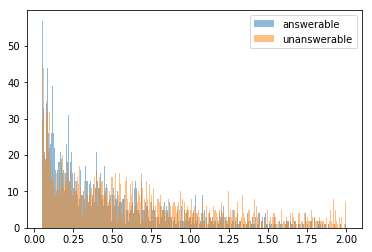

In [10]:
#bins = np.linspace(.00000001, .000025, 300)
bins = np.linspace(.05, 2, 500)
plt.hist(ans_losses, bins, alpha=0.5, label='answerable')
plt.hist(unans_losses, bins, alpha=0.5, label='unanswerable')
plt.legend(loc='upper right')
plt.show()

In [15]:
stops = np.linspace(1, 6000, 300)

In [16]:
ans_prog = []
unans_prog = []
xes = []
for x in np.round(stops):
    x = int(x)
    xes.append(x)
    ans_prog.append(np.sum(ans_losses[:x]))
    unans_prog.append(np.sum(unans_losses[:x]))

In [24]:
import pickle

In [54]:
with open("dataset/dev-v2.0.json", 'r') as handle:
    jdata = json.load(handle)
    data = jdata['data']

questions = []
contexts = []
qids = []
id2idx = {}
q2c = {}
for i in range(len(data)):
    section = data[i]['paragraphs']
    for sec in section:
        qas = sec['qas']
        context = sec['context']
        contexts.append(context)
        for j in range(len(qas)):
            question = qas[j]['question']
            unanswerable = qas[j]['is_impossible']
            id = qas[j]['id']
            id2idx[id] = len(questions)
            questions.append(question)
            qids.append(id)
            q2c[id] = len(contexts)-1
            

with open("val_data_chunks.pkl", "rb") as handle:
    mask_data_map = pickle.load(handle)

In [29]:
len(questions), len(mask_data_map), len(losses)

(11873, 11873, 11873)

In [71]:
np.sum(np.array(unans_losses) < min(unans_losses) + .00001)

12

In [65]:
np.sum(np.array(ans_losses) < min(ans_losses) + .00001)

17

In [56]:
for loss in losses:
    if loss[-1] == 'UNANS':
        continue
    if float(loss[2]) > max(ans_losses) - 2:
        id, mask_id, loss, _ = loss
        mask_id = int(mask_id)
        question = questions[id2idx[id]]
        mask = mask_data_map[id2idx[id]][mask_id][0]
        context = contexts[q2c[id]]
        print(context)
        print("~"*20)
        print(question)
        print("~"*20)
        print(mask)
        print("~"*20)
        print(loss)
        print("#"*20)

Extension causes the rock units as a whole to become longer and thinner. This is primarily accomplished through normal faulting and through the ductile stretching and thinning. Normal faults drop rock units that are higher below those that are lower. This typically results in younger units being placed below older units. Stretching of units can result in their thinning; in fact, there is a location within the Maria Fold and Thrust Belt in which the entire sedimentary sequence of the Grand Canyon can be seen over a length of less than a meter. Rocks at the depth to be ductilely stretched are often also metamorphosed. These stretched rocks can also pinch into lenses, known as boudins, after the French word for "sausage", because of their visual similarity.
~~~~~~~~~~~~~~~~~~~~
What causes rock extension?
~~~~~~~~~~~~~~~~~~~~
['what', 'causes', '[MASK]', '[MASK]', '?']
~~~~~~~~~~~~~~~~~~~~
3.523505926132202
####################
Most of the Huguenot congregations (or individuals) in North 

British victories continued in all theaters in the Annus Mirabilis of 1759, when they finally captured Ticonderoga, James Wolfe defeated Montcalm at Quebec (in a battle that claimed the lives of both commanders), and victory at Fort Niagara successfully cut off the French frontier forts further to the west and south. The victory was made complete in 1760 when, despite losing outside Quebec City in the Battle of Sainte-Foy, the British were able to prevent the arrival of French relief ships in the naval Battle of the Restigouche while armies marched on Montreal from three sides.
~~~~~~~~~~~~~~~~~~~~
Who defeated Montcalm at Quebec?
~~~~~~~~~~~~~~~~~~~~
['who', 'defeated', '[MASK]', '[MASK]', '[MASK]', '[MASK]', '[MASK]', '?']
~~~~~~~~~~~~~~~~~~~~
4.1232500076293945
####################


In [58]:
for loss in losses:
    if loss[-1] == 'ANS':
        continue
    if float(loss[2]) > max(unans_losses) - 1:
        id, mask_id, loss, _ = loss
        mask_id = int(mask_id)
        question = questions[id2idx[id]]
        mask = mask_data_map[id2idx[id]][mask_id][0]
        context = contexts[q2c[id]]
        print(context)
        print("~"*20)
        print(question)
        print("~"*20)
        print(mask)
        print("~"*20)
        print(loss)
        print("#"*20)

are prime. Prime numbers of this form are known as factorial primes. Other primes where either p + 1 or p − 1 is of a particular shape include the Sophie Germain primes (primes of the form 2p + 1 with p prime), primorial primes, Fermat primes and Mersenne primes, that is, prime numbers that are of the form 2p − 1, where p is an arbitrary prime. The Lucas–Lehmer test is particularly fast for numbers of this form. This is why the largest known prime has almost always been a Mersenne prime since the dawn of electronic computers.
~~~~~~~~~~~~~~~~~~~~
Of what form are Sophie Germain tests?
~~~~~~~~~~~~~~~~~~~~
['of', 'what', 'form', 'are', '[MASK]', '[MASK]', '[MASK]', '?']
~~~~~~~~~~~~~~~~~~~~
4.431605339050293
####################
Charles W. Eliot, president 1869–1909, eliminated the favored position of Christianity from the curriculum while opening it to student self-direction. While Eliot was the most crucial figure in the secularization of American higher education, he was motivated no

In [66]:
for loss in losses:
    if loss[-1] == 'UNANS':
        continue
    if float(loss[2]) < min(ans_losses) + .00001:
        id, mask_id, loss, _ = loss
        mask_id = int(mask_id)
        question = questions[id2idx[id]]
        mask = mask_data_map[id2idx[id]][mask_id][0]
        context = contexts[q2c[id]]
        print(context)
        print("~"*20)
        print(question)
        print("~"*20)
        print(mask)
        print("~"*20)
        print(loss)
        print("#"*20)

Using boiling water to produce mechanical motion goes back over 2000 years, but early devices were not practical. The Spanish inventor Jerónimo de Ayanz y Beaumont obtained the first patent for a steam engine in 1606. In 1698 Thomas Savery patented a steam pump that used steam in direct contact with the water being pumped. Savery's steam pump used condensing steam to create a vacuum and draw water into a chamber, and then applied pressurized steam to further pump the water. Thomas Newcomen's atmospheric engine was the first commercial true steam engine using a piston, and was used in 1712 for pumping in a mine.
~~~~~~~~~~~~~~~~~~~~
What was the nationality of Jerónimo de Ayanz y Beaumont?
~~~~~~~~~~~~~~~~~~~~
['what', 'was', 'the', 'nationality', 'of', 'je', '##ron', '##imo', 'de', 'a', '##yan', '##z', 'y', '[MASK]', '?']
~~~~~~~~~~~~~~~~~~~~
9.894371032714844e-06
####################
The Yuan dynasty (Chinese: 元朝; pinyin: Yuán Cháo), officially the Great Yuan (Chinese: 大元; pinyin: Dà 

In [72]:
for loss in losses:
    if loss[-1] == 'ANS':
        continue
    if float(loss[2]) < min(unans_losses) + .00001:
        id, mask_id, loss, _ = loss
        mask_id = int(mask_id)
        question = questions[id2idx[id]]
        mask = mask_data_map[id2idx[id]][mask_id][0]
        context = contexts[q2c[id]]
        print(context)
        print("~"*20)
        print(question)
        print("~"*20)
        print(mask)
        print("~"*20)
        print(loss)
        print("#"*20)

Paul Revere was descended from Huguenot refugees, as was Henry Laurens, who signed the Articles of Confederation for South Carolina; Jack Jouett, who made the ride from Cuckoo Tavern to warn Thomas Jefferson and others that Tarleton and his men were on their way to arrest him for crimes against the king; Francis Marion, and a number of other leaders of the American Revolution and later statesmen. The last active Huguenot congregation in North America worships in Charleston, South Carolina, at a church that dates to 1844. The Huguenot Society of America maintains Manakin Episcopal Church in Virginia as an historic shrine with occasional services. The Society has chapters in numerous states, with the one in Texas being the largest.
~~~~~~~~~~~~~~~~~~~~
In what year was the Articles of Confederation for South Carolina signed?
~~~~~~~~~~~~~~~~~~~~
['in', 'what', 'year', 'was', 'the', 'articles', 'of', '[MASK]', 'for', 'south', 'carolina', 'signed', '?']
~~~~~~~~~~~~~~~~~~~~
1.7166137695312

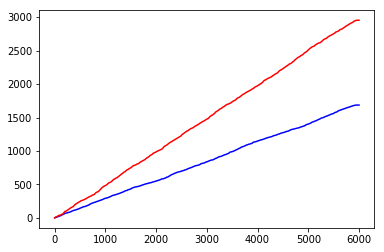

In [17]:
plt.plot(xes, ans_prog, color='blue')
plt.plot(xes, unans_prog, color='red')

In [18]:
print(np.mean([l for l in ans_losses if l > 0.04]))
print(np.mean([l for l in unans_losses if l > 0.04]))

0.544641501158038
0.8278152950307434


In [19]:
print(np.mean([l for l in ans_losses if l < 0.04]))
print(np.mean([l for l in unans_losses if l < 0.04]))

0.006205307554695026
0.006129172360363978


In [70]:
from pytorch_pretrained_bert.tokenization import BertTokenizer

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [71]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case=True)

In [76]:
with open("dataset/dev-v2.0.json", 'r') as handle:
    jdata = json.load(handle)
    data = jdata['data']

id2q = {}
for i in range(len(data)):
    section = data[i]['paragraphs']
    for sec in section:
        qas = sec['qas']
        for j in range(len(qas)):
            question = qas[j]['question']
            unanswerable = qas[j]['is_impossible']
            id = qas[j]['id']
            id2q[id] = question

In [77]:
for i, l, tag in losses:
    assert i in id2q

In [79]:
adjusted_losses = []
for idx, l, tag in losses:
    l = float(l)
    qlen = len(tokenizer.tokenize(id2q[idx]))
    adjusted_losses.append([idx, l / qlen, tag])

In [82]:
ans_losses = [float(x[1]) for x in adjusted_losses if x[2] == 'ANS']
unans_losses = [float(x[1]) for x in adjusted_losses if x[2] == 'UNANS']

In [83]:
print(np.mean(ans_losses))
print(np.mean(unans_losses))

0.0008983249290571931
0.0010332992713177405


In [84]:
print(np.min(ans_losses + unans_losses))
print(np.max(ans_losses + unans_losses))

3.14580069647895e-08
0.027308174542018344


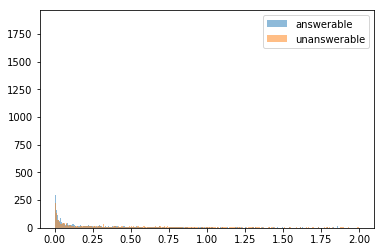

In [21]:
bins = np.linspace(0, 2, 500)
plt.hist(ans_losses, bins, alpha=0.5, label='answerable')
plt.hist(unans_losses, bins, alpha=0.5, label='unanswerable')
plt.legend(loc='upper right')
plt.show()

In [102]:
with open("dataset/dev-v2.0.json", 'r') as handle:
    jdata = json.load(handle)
    data = jdata['data']

id2q = {}
for i in range(len(data)):
    section = data[i]['paragraphs']
    for sec in section:
        context = sec['context']
        qas = sec['qas']
        for j in range(len(qas)):
            question = qas[j]['question']
            unanswerable = qas[j]['is_impossible']
            id = qas[j]['id']
            id2q[id] = (question, context)

In [121]:
from collections import Counter

In [124]:
ans_loss_counter = Counter({x[0]:float(x[1]) for x in adjusted_losses if x[2] == 'ANS'})
unans_loss_counter = Counter({x[0]:float(x[1]) for x in adjusted_losses if x[2] == 'UNANS'})

In [127]:
for idx, loss in ans_loss_counter.most_common()[:5]:
    print("loss:", loss)
    print("context:\n", id2q[idx][1])
    print("~"*20)
    print("question:\n", id2q[idx][0])
    print("#"*20)

loss: 0.0210401713848114
context:
 The Normans were in contact with England from an early date. Not only were their original Viking brethren still ravaging the English coasts, they occupied most of the important ports opposite England across the English Channel. This relationship eventually produced closer ties of blood through the marriage of Emma, sister of Duke Richard II of Normandy, and King Ethelred II of England. Because of this, Ethelred fled to Normandy in 1013, when he was forced from his kingdom by Sweyn Forkbeard. His stay in Normandy (until 1016) influenced him and his sons by Emma, who stayed in Normandy after Cnut the Great's conquest of the isle.
~~~~~~~~~~~~~~~~~~~~
question:
 Who did Emma Marry?
####################
loss: 0.01971820294857025
context:
 The efficiency of a Rankine cycle is usually limited by the working fluid. Without the pressure reaching supercritical levels for the working fluid, the temperature range the cycle can operate over is quite small; in ste

In [128]:
for idx, loss in unans_loss_counter.most_common()[:5]:
    print("loss:", loss)
    print("context:\n", id2q[idx][1])
    print("~"*20)
    print("question:\n", id2q[idx][0])
    print("#"*20)

loss: 0.027308174542018344
context:
 Jacksonville is in the First Coast region of northeast Florida and is centered on the banks of the St. Johns River, about 25 miles (40 km) south of the Georgia state line and about 340 miles (550 km) north of Miami. The Jacksonville Beaches communities are along the adjacent Atlantic coast. The area was originally inhabited by the Timucua people, and in 1564 was the site of the French colony of Fort Caroline, one of the earliest European settlements in what is now the continental United States. Under British rule, settlement grew at the narrow point in the river where cattle crossed, known as Wacca Pilatka to the Seminole and the Cow Ford to the British. A platted town was established there in 1822, a year after the United States gained Florida from Spain; it was named after Andrew Jackson, the first military governor of the Florida Territory and seventh President of the United States.
~~~~~~~~~~~~~~~~~~~~
question:
 What cities 340 km from Jacksonv

In [129]:
for idx, loss in ans_loss_counter.most_common()[-5:]:
    print("loss:", loss)
    print("context:\n", id2q[idx][1])
    print("~"*20)
    print("question:\n", id2q[idx][0])
    print("#"*20)

loss: 4.6359168158637154e-08
context:
 With Istanbul as its capital and control of lands around the Mediterranean basin, the Ottoman Empire was at the center of interactions between the Eastern and Western worlds for six centuries. Following a long period of military setbacks against European powers, the Ottoman Empire gradually declined into the late nineteenth century. The empire allied with Germany in the early 20th century, with the imperial ambition of recovering its lost territories, but it dissolved in the aftermath of World War I, leading to the emergence of the new state of Turkey in the Ottoman Anatolian heartland, as well as the creation of modern Balkan and Middle Eastern states, thus ending Turkish colonial ambitions.
~~~~~~~~~~~~~~~~~~~~
question:
 What was the capital of the Ottoman empire?
####################
loss: 4.6193599700927736e-08
context:
 However, in 1883–84 Germany began to build a colonial empire in Africa and the South Pacific, before losing interest in imp

In [130]:
for idx, loss in unans_loss_counter.most_common()[-5:]:
    print("loss:", loss)
    print("context:\n", id2q[idx][1])
    print("~"*20)
    print("question:\n", id2q[idx][0])
    print("#"*20)

loss: 4.842877388000488e-08
context:
 In World War II, it was recognised that the Rhine would present a formidable natural obstacle to the invasion of Germany, by the Western Allies. The Rhine bridge at Arnhem, immortalized in the book, A Bridge Too Far and the film, was a central focus of the battle for Arnhem, during the failed Operation Market Garden of September 1944. The bridges at Nijmegen, over the Waal distributary of the Rhine, were also an objective of Operation Market Garden. In a separate operation, the Ludendorff Bridge, crossing the Rhine at Remagen, became famous, when U.S. forces were able to capture it intact – much to their own surprise – after the Germans failed to demolish it. This also became the subject of a film, The Bridge at Remagen. Seven Days to the River Rhine was a Warsaw Pact war plan for an invasion of Western Europe during the Cold War.
~~~~~~~~~~~~~~~~~~~~
question:
 How long did the Cold War last?
####################
loss: 4.6566128730773926e-08
conte